# 导入数据

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplfinance.original_flavor import candlestick_ochl
plt.rcParams['font.sans-serif'] = ['SimHei']

In [26]:
# 读取数据
df = pd.read_csv('联动科技_data.csv')
df

,基金代码,时间,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅,成交量,成交额,换手率
0,SZ301369,2022-09-21 16:00:00,87.9095,91.1654,84.0675,87.7792,24.8881,39.57,7354103,996703585.0,62.81
1,SZ301369,2022-09-22 16:00:00,88.2220,88.8732,82.7065,83.1689,-4.6103,-5.25,5159096,681929234.0,43.75
2,SZ301369,2022-09-25 16:00:00,79.1837,80.2907,76.6766,79.2944,-3.8745,-4.66,4064650,490275594.0,34.50
3,SZ301369,2022-09-26 16:00:00,78.1613,81.7688,76.2403,77.8162,-1.4782,-1.86,3474995,419023973.0,29.60
4,SZ301369,2022-09-27 16:00:00,76.8459,77.4124,69.2662,69.3378,-8.4784,-10.90,3837205,429259199.0,32.50
...,...,...,...,...,...,...,...,...,...,...,...
416,SZ301369,2024-06-16 16:00:00,46.3000,47.5100,45.4800,47.3700,0.9900,2.13,2801127,131214866.0,11.54
417,SZ301369,2024-06-17 16:00:00,46.8000,47.3000,45.8500,47.0000,-0.3700,-0.78,2442001,114083933.0,10.06
418,SZ301369,2024-06-18 16:00:00,47.0300,48.4600,45.5800,48.4500,1.4500,3.09,3576728,169175825.0,14.74
419,SZ301369,2024-06-19 16:00:00,47.9700,49.9800,47.4500,48.9100,0.4600,0.95,4239801,208022451.0,17.47


# 数据清理

In [27]:
# 检查缺失值
missing_values = df.isnull().sum()
# 对时间数据进行修改
df['时间'] = df['时间'].apply(lambda x: x.split(' ')[0])
# 定义一个函数来将数字转换为带有百分号的字符串
def add_percentage(x):
    return f"{x}%"
df['换手率'] = df['换手率'].apply(add_percentage)
# 修改列名
df.columns = [
    'fund code', 'date', 'open', 'high', 'low', 'close', 
    'price_change', 'p_change', 'trading volume', 'trading amount', 'turnover'
]

df

,fund code,date,open,high,low,close,price_change,p_change,trading volume,trading amount,turnover
0,SZ301369,2022-09-21,87.9095,91.1654,84.0675,87.7792,24.8881,39.57,7354103,996703585.0,62.81%
1,SZ301369,2022-09-22,88.2220,88.8732,82.7065,83.1689,-4.6103,-5.25,5159096,681929234.0,43.75%
2,SZ301369,2022-09-25,79.1837,80.2907,76.6766,79.2944,-3.8745,-4.66,4064650,490275594.0,34.5%
3,SZ301369,2022-09-26,78.1613,81.7688,76.2403,77.8162,-1.4782,-1.86,3474995,419023973.0,29.6%
4,SZ301369,2022-09-27,76.8459,77.4124,69.2662,69.3378,-8.4784,-10.90,3837205,429259199.0,32.5%
...,...,...,...,...,...,...,...,...,...,...,...
416,SZ301369,2024-06-16,46.3000,47.5100,45.4800,47.3700,0.9900,2.13,2801127,131214866.0,11.54%
417,SZ301369,2024-06-17,46.8000,47.3000,45.8500,47.0000,-0.3700,-0.78,2442001,114083933.0,10.06%
418,SZ301369,2024-06-18,47.0300,48.4600,45.5800,48.4500,1.4500,3.09,3576728,169175825.0,14.74%
419,SZ301369,2024-06-19,47.9700,49.9800,47.4500,48.9100,0.4600,0.95,4239801,208022451.0,17.47%


In [28]:
data = df.sort_index()

In [29]:
data['index'] = [i for i in range(data.shape[0])]
data

,fund code,date,open,high,low,close,price_change,p_change,trading volume,trading amount,turnover,index
0,SZ301369,2022-09-21,87.9095,91.1654,84.0675,87.7792,24.8881,39.57,7354103,996703585.0,62.81%,0
1,SZ301369,2022-09-22,88.2220,88.8732,82.7065,83.1689,-4.6103,-5.25,5159096,681929234.0,43.75%,1
2,SZ301369,2022-09-25,79.1837,80.2907,76.6766,79.2944,-3.8745,-4.66,4064650,490275594.0,34.5%,2
3,SZ301369,2022-09-26,78.1613,81.7688,76.2403,77.8162,-1.4782,-1.86,3474995,419023973.0,29.6%,3
4,SZ301369,2022-09-27,76.8459,77.4124,69.2662,69.3378,-8.4784,-10.90,3837205,429259199.0,32.5%,4
...,...,...,...,...,...,...,...,...,...,...,...,...
416,SZ301369,2024-06-16,46.3000,47.5100,45.4800,47.3700,0.9900,2.13,2801127,131214866.0,11.54%,416
417,SZ301369,2024-06-17,46.8000,47.3000,45.8500,47.0000,-0.3700,-0.78,2442001,114083933.0,10.06%,417
418,SZ301369,2024-06-18,47.0300,48.4600,45.5800,48.4500,1.4500,3.09,3576728,169175825.0,14.74%,418
419,SZ301369,2024-06-19,47.9700,49.9800,47.4500,48.9100,0.4600,0.95,4239801,208022451.0,17.47%,419


In [30]:
value = data[['index', 'open', 'close', 'high', 'low']]
val = value.values
val

array([[  0.    ,  87.9095,  87.7792,  91.1654,  84.0675],
       [  1.    ,  88.222 ,  83.1689,  88.8732,  82.7065],
       [  2.    ,  79.1837,  79.2944,  80.2907,  76.6766],
       ...,
       [418.    ,  47.03  ,  48.45  ,  48.46  ,  45.58  ],
       [419.    ,  47.97  ,  48.91  ,  49.98  ,  47.45  ],
       [420.    ,  47.73  ,  52.71  ,  54.    ,  45.03  ]])

<function matplotlib.pyplot.show(close=None, block=None)>

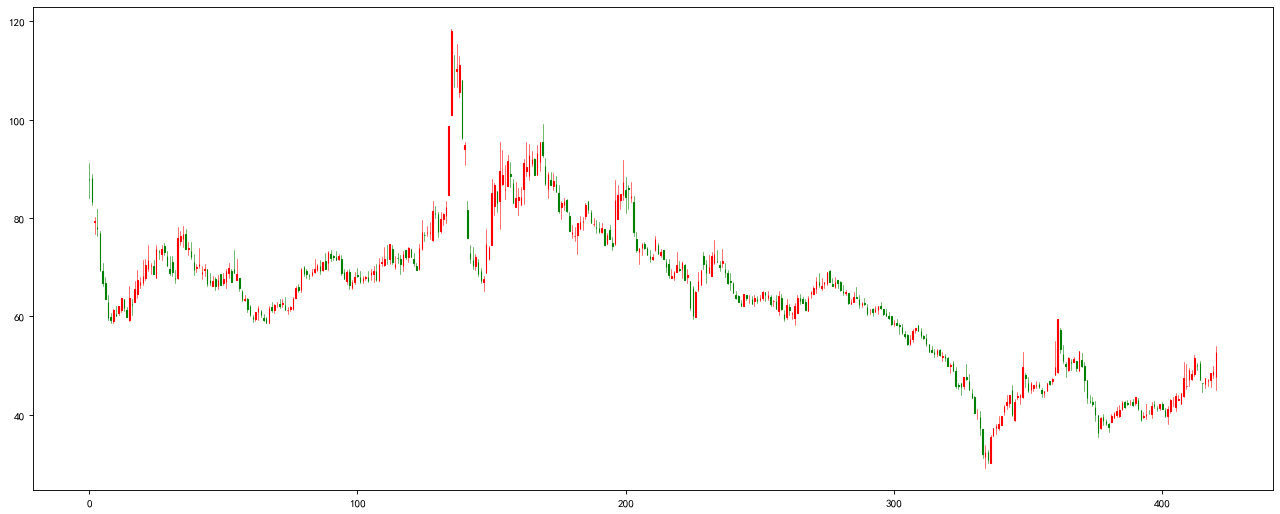

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=80)
candlestick_ochl(axes, val, width=0.2, colorup='r', colordown='g')
plt.show

# 股票数据重采样

In [32]:
data.index = pd.to_datetime(data.date)

In [33]:
# 日k线转为周k线
stock_week_k = data.resample('W').last()
stock_week_k.head()

,fund code,date,open,high,low,close,price_change,p_change,trading volume,trading amount,turnover,index
date,,,,,,,,,,,,
2022-09-25,SZ301369,2022-09-25,79.1837,80.2907,76.6766,79.2944,-3.8745,-4.66,4064650,490275594.0,34.5%,2
2022-10-02,SZ301369,2022-09-29,66.7656,67.9768,63.4511,63.4902,-3.2559,-4.88,2251898,227164661.0,18.68%,6
2022-10-09,SZ301369,2022-10-09,62.8911,64.3888,59.1598,59.5831,-3.9071,-6.15,2323514,219866649.0,19.74%,7
2022-10-16,SZ301369,2022-10-16,61.2110,63.6465,60.8920,63.6465,1.6215,2.61,2061939,197340047.0,17.46%,12
2022-10-23,SZ301369,2022-10-23,62.8390,67.1303,62.8390,65.5479,3.2364,5.19,2900532,289605152.0,24.81%,17


In [35]:
stock_week_k['open'] = data['open'].resample('W').first()
stock_week_k['close'] = data['close'].resample('W').last()
stock_week_k['high'] = data['high'].resample('W').max()
stock_week_k['low'] = data['low'].resample('W').min()
stock_week_k

,fund code,date,open,high,low,close,price_change,p_change,trading volume,trading amount,turnover,index
date,,,,,,,,,,,,
2022-09-25,SZ301369,2022-09-25,87.9095,91.1654,76.6766,79.2944,-3.8745,-4.66,4064650,490275594.0,34.5%,2
2022-10-02,SZ301369,2022-09-29,78.1613,81.7688,63.4511,63.4902,-3.2559,-4.88,2251898,227164661.0,18.68%,6
2022-10-09,SZ301369,2022-10-09,62.8911,64.3888,59.1598,59.5831,-3.9071,-6.15,2323514,219866649.0,19.74%,7
2022-10-16,SZ301369,2022-10-16,59.9087,63.6465,58.5412,63.6465,1.6215,2.61,2061939,197340047.0,17.46%,12
2022-10-23,SZ301369,2022-10-23,63.4837,67.1303,59.0752,65.5479,3.2364,5.19,2900532,289605152.0,24.81%,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26,SZ301369,2024-05-26,41.3106,42.4758,38.1237,41.2310,1.5836,3.99,1726972,68916762.0,7.12%,402
2024-06-02,SZ301369,2024-06-02,40.6434,44.4000,40.2749,44.4000,1.2200,2.83,2640590,115021414.0,10.88%,407
2024-06-09,SZ301369,2024-06-06,43.7500,50.7500,43.5500,48.3300,-0.7500,-1.53,3868769,185849023.0,15.95%,411


<function matplotlib.pyplot.show(close=None, block=None)>

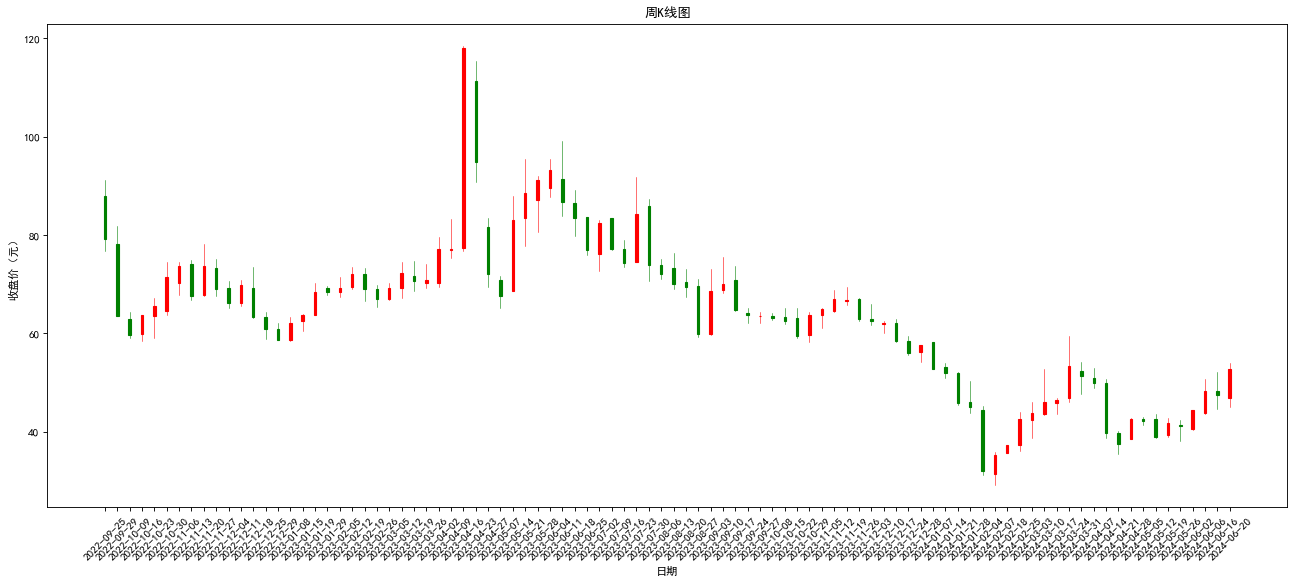

In [36]:
stock_week_k['date'] = pd.to_datetime(stock_week_k['date'])

# 准备数据
stock_week_k['index'] = [i for i in range(stock_week_k.shape[0])]
value_week = stock_week_k[['index', 'open', 'close', 'high', 'low']]
value_week = value_week.values

# 创建图形并绘制K线图
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=80)
plt.title('周K线图')
plt.xlabel('日期')
plt.ylabel('收盘价（元）')
candlestick_ochl(axes, value_week, width=0.2, colorup='r', colordown='g')

# 设置x轴的刻度位置和标签
axes.set_xticks(stock_week_k['index'])
axes.set_xticklabels(stock_week_k['date'].dt.strftime('%Y-%m-%d'), rotation=45)

plt.show

# MACD分析

In [37]:
import talib

<function matplotlib.pyplot.show(close=None, block=None)>

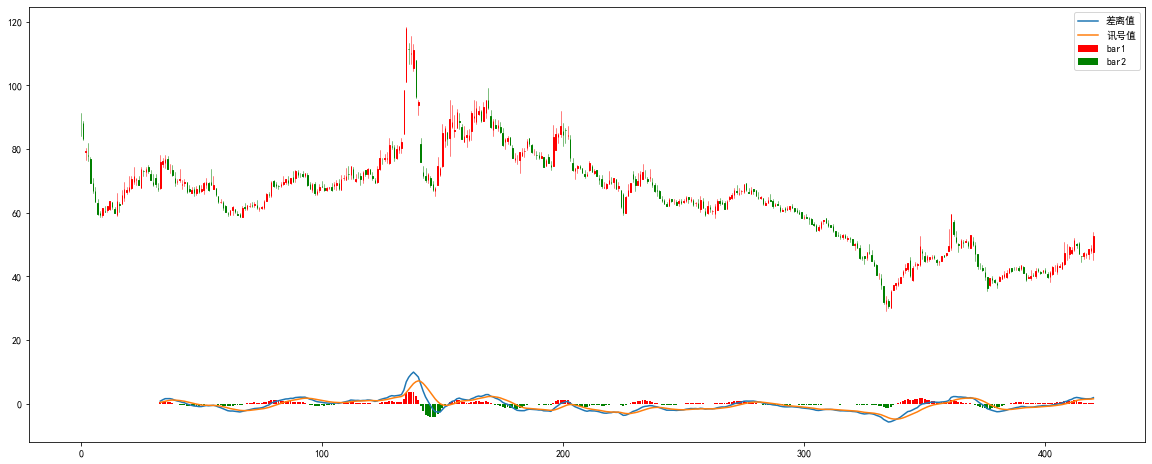

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
# macd, macdsignal, machist=MACD(close, s)
dif, dea, macdbar = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26,signalperiod=9)

x = [i for i in range(len(df.index))]

plt.plot(x, dif, label='差离值')
plt.plot(x, dea, label='讯号值')

# 如果MACD的值大于0，保留， 小于0， 变成0
bar1 = np.where(macdbar>0, macdbar, 0)

# 如果MACD的值小于0，保留， 大于0， 变成0
bar2 = np.where(macdbar<0, macdbar, 0)

plt.bar(x, bar1, color='r', label='bar1')
plt.bar(x, bar2, color='g', label='bar2')

# 显示K线图
candlestick_ochl(axes, val, width=0.2, colorup='r', colordown='g')

plt.legend(loc='best')

plt.show

In [39]:
for i in range(len(df.index)):
    # DIF差离值与DEA讯号线的交替状态
    # 买入信号
    # 昨天的DIF差离值小于DEA讯号线并且今日的DIF差离值大于DEA讯号线
    if (dif[i-1]-dea[i-1]<0) and (dif[i]-dea[i]>0):
        print('在第%d天， 买入了《联动科技》股票xxx量'%i)
    
    # 卖出信号
    if (dif[i-1]-dea[i-1]>0) and (dif[i]-dea[i]<0):
        print('在第%d天， 卖出了《联动科技》股票xxx量'%i)

在第39天， 卖出了《联动科技》股票xxx量
在第55天， 买入了《联动科技》股票xxx量
在第56天， 卖出了《联动科技》股票xxx量
在第69天， 买入了《联动科技》股票xxx量
在第95天， 卖出了《联动科技》股票xxx量
在第109天， 买入了《联动科技》股票xxx量
在第121天， 卖出了《联动科技》股票xxx量
在第124天， 买入了《联动科技》股票xxx量
在第141天， 卖出了《联动科技》股票xxx量
在第153天， 买入了《联动科技》股票xxx量
在第171天， 卖出了《联动科技》股票xxx量
在第196天， 买入了《联动科技》股票xxx量
在第204天， 卖出了《联动科技》股票xxx量
在第228天， 买入了《联动科技》股票xxx量
在第240天， 卖出了《联动科技》股票xxx量
在第251天， 买入了《联动科技》股票xxx量
在第259天， 卖出了《联动科技》股票xxx量
在第260天， 买入了《联动科技》股票xxx量
在第262天， 卖出了《联动科技》股票xxx量
在第263天， 买入了《联动科技》股票xxx量
在第282天， 卖出了《联动科技》股票xxx量
在第339天， 买入了《联动科技》股票xxx量
在第370天， 卖出了《联动科技》股票xxx量
在第385天， 买入了《联动科技》股票xxx量


# 使用折线图和直方图展示数据

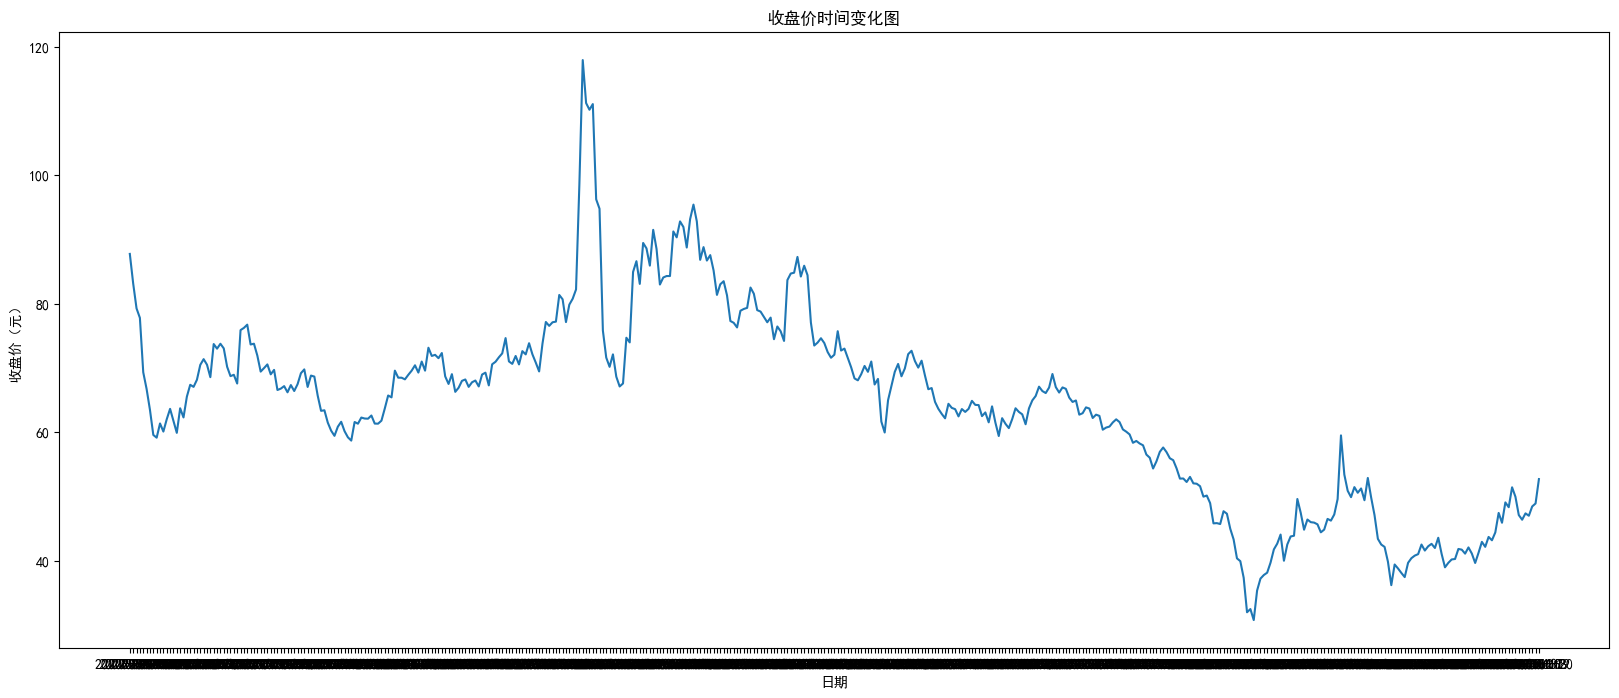

In [202]:
# 绘制图形
plt.figure(figsize=(20, 8))
plt.plot(s['时间'], df['收盘价'])
plt.title('收盘价时间变化图')
plt.xlabel('日期')
plt.ylabel('收盘价（元）')

plt.show()

In [203]:
# 将数据时间转为月展示

In [204]:
# 计算每日回报率
df['Daily Return'] = df['收盘价'].pct_change()
df['Daily Return']

0           NaN
1     -0.052522
2     -0.046586
3     -0.018642
4     -0.108954
         ...   
416    0.021345
417   -0.007811
418    0.030851
419    0.009494
420    0.077694
Name: Daily Return, Length: 421, dtype: float64

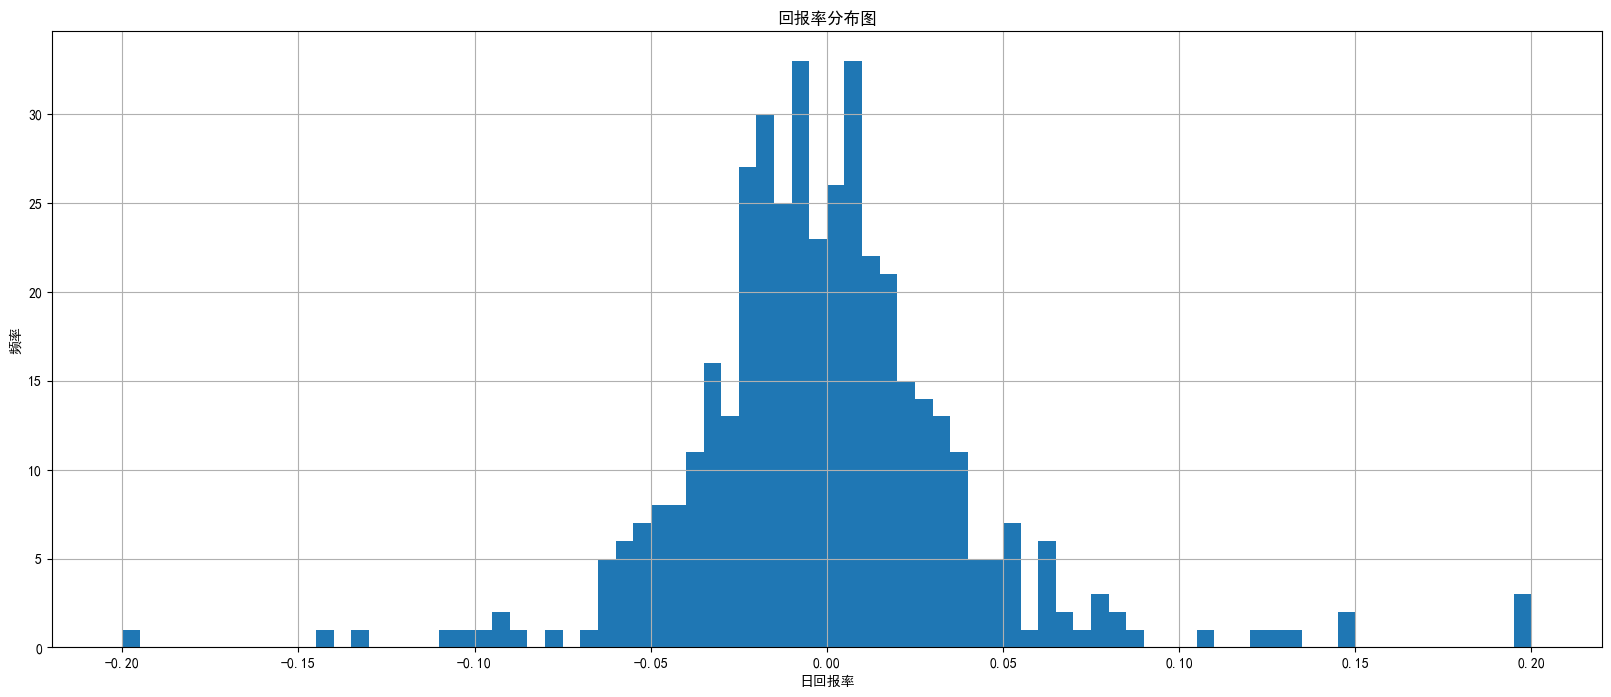

In [205]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 绘制回报率的分布图
plt.figure(figsize=(20,8))
df['Daily Return'].hist(bins=80)
plt.title('回报率分布图')
plt.xlabel('日回报率')
plt.ylabel('频率')
plt.rcParams['axes.unicode_minus'] = False    #支持负号显示
plt.show()

# 移动平均线分析

In [206]:
# 计算移动平均线
df['SMA5'] = df['收盘价'].rolling(window=5).mean()
df['SMA50'] = df['收盘价'].rolling(window=50).mean()
df['SMA200'] = df['收盘价'].rolling(window=200).mean()

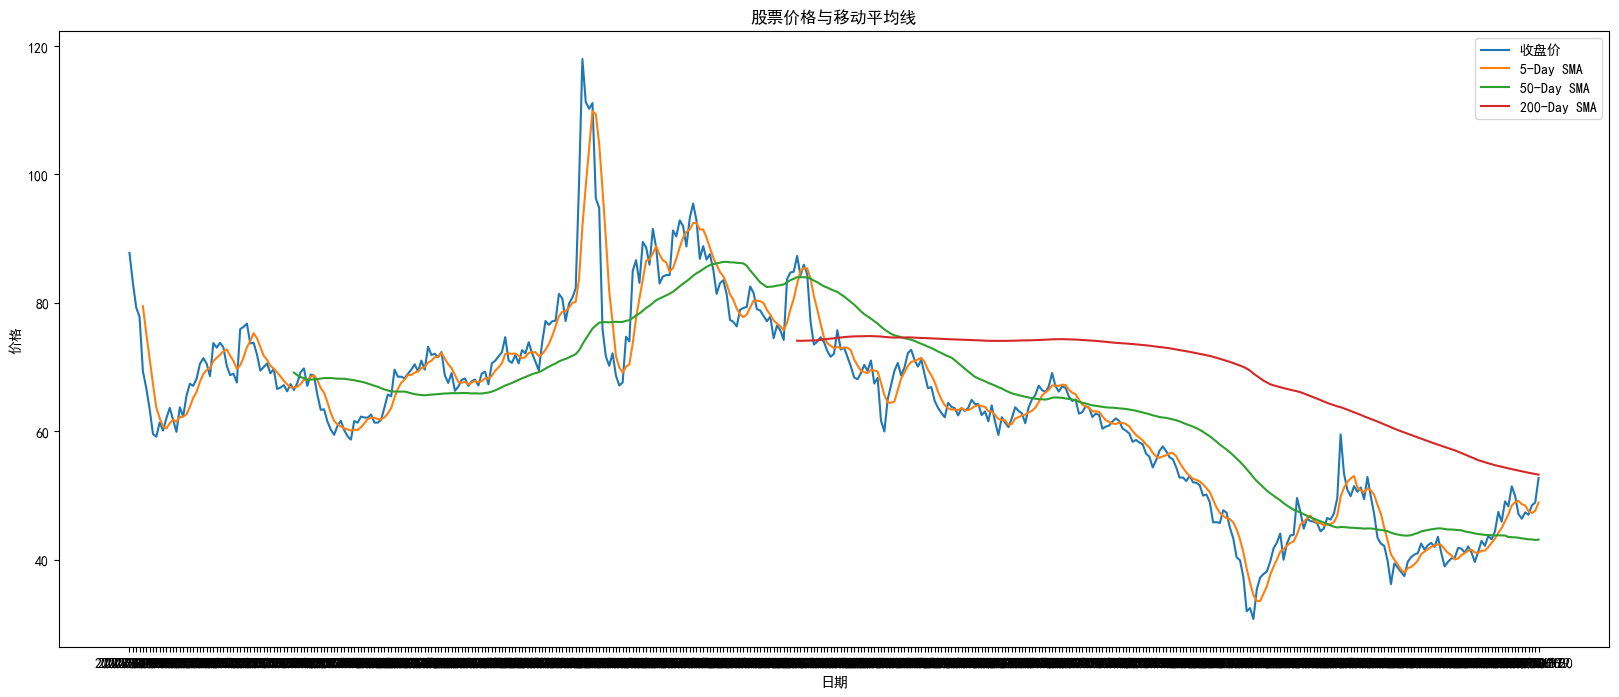

In [207]:
# 绘制移动平均线
plt.figure(figsize=(20,8))
plt.plot(df['时间'], df['收盘价'], label='收盘价')
plt.plot(df['时间'], df['SMA5'], label='5-Day SMA')
plt.plot(df['时间'], df['SMA50'], label='50-Day SMA')
plt.plot(df['时间'], df['SMA200'], label='200-Day SMA')
plt.title('股票价格与移动平均线')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.show()